# Volume 4: Anisotropic Diffusion
    Benj McMullin
    Math 437
    11/30/2023

In [1]:
import numpy as np
from numpy.random import randint
from matplotlib import cm, pyplot as plt
from imageio.v3 import imread, imwrite
from numpy.random import randint
plt.rcParams['figure.figsize'] = (16,10)

# Problem 1

Complete the following function, by implementing the anisotropic diffusion algorithm found in 10.1 for black and white images.
Run the function on coke_balloon.jpg. Show the original image and the diffused image for σ = .1,
λ = .25, N = 5, 20, 100.

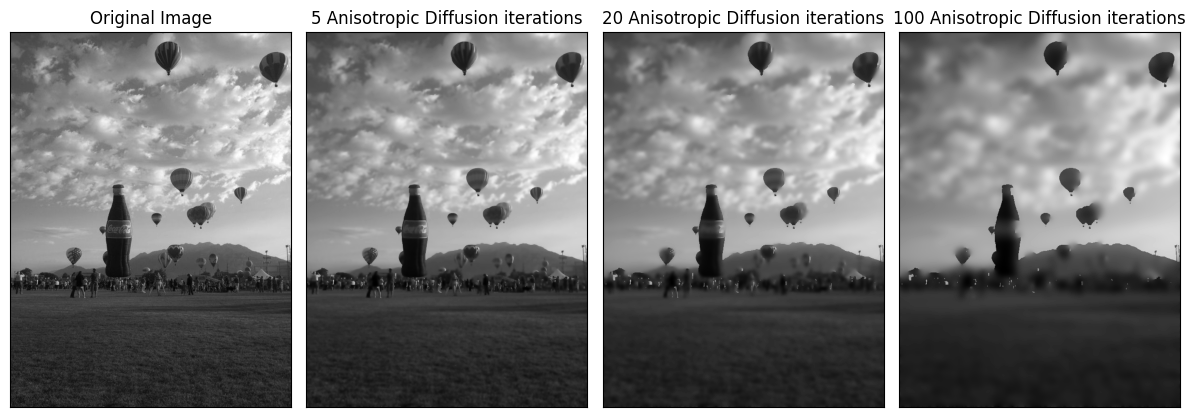

In [7]:
def anisdiff_bw(U, N, lambda_, g):
    """
    Utilize the Anisotropic Diffusion differencing scheme on the grayscale 
    values represented by the array U, which corresponds to an image. 
    Conduct N iterations, incorporating the function g to limit diffusion 
    across the image boundaries. Execute the operation on U in-place to 
    enhance performance optimization. 
    """
    # Pad the image with a 1-pixel border of zeros
    U = np.pad(U, 1, mode = 'edge')

    # Perform N iterations of the Anisotropic Diffusion algorithm
    for _ in range(N):
        U1 = U[1:-1, 1:-1]
        U[1:-1, 1:-1] = U1 + lambda_ * (g(np.abs(U[1:-1, 2:] - U1)) * (U[1:-1, 2:] - U1) + g(np.abs(U[1:-1, :-2] - U1)) * (U[1:-1, :-2] - U1) \
                                        + g(np.abs(U[2:, 1:-1] - U1)) * (U[2:, 1:-1] - U1) + g(np.abs(U[:-2, 1:-1] - U1)) * (U[:-2, 1:-1] - U1))
    
    # Return the image without the zero border
    return U[1:-1, 1:-1]


# Define parameters
s = 0.1
l = 0.25
n = [5, 20, 100]

# Define the function g
g = lambda x: np.exp(-(x / s) ** 2)

# Load the im
U = imread("coke_balloon.jpg", mode = "F") * 1. / 255

# Plot the original im
plt.figure(figsize = (12, 20))
plt.subplot(1, 4, 1)
plt.imshow(U, cmap = cm.gray)
plt.title("Original Image")
plt.xticks([])
plt.yticks([])

# Apply Anisotropic Diffusion to the image
for i, N in enumerate(n):
    U2 = U.copy()
    U2 = anisdiff_bw(U2, N, l, g)
    plt.subplot(1, 4, i + 2)
    plt.imshow(U2, cmap = cm.gray)
    plt.title(f"{N} Anisotropic Diffusion iterations")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

# Problem 2

Complete the following function to process a colored image.
Run the function on balloons_color.jpg. Show the original image and the diffused image for
σ = .1, λ = .25, N = 5, 20, 100.

(802, 602, 3)
(802, 602, 3)
(802, 602, 3)


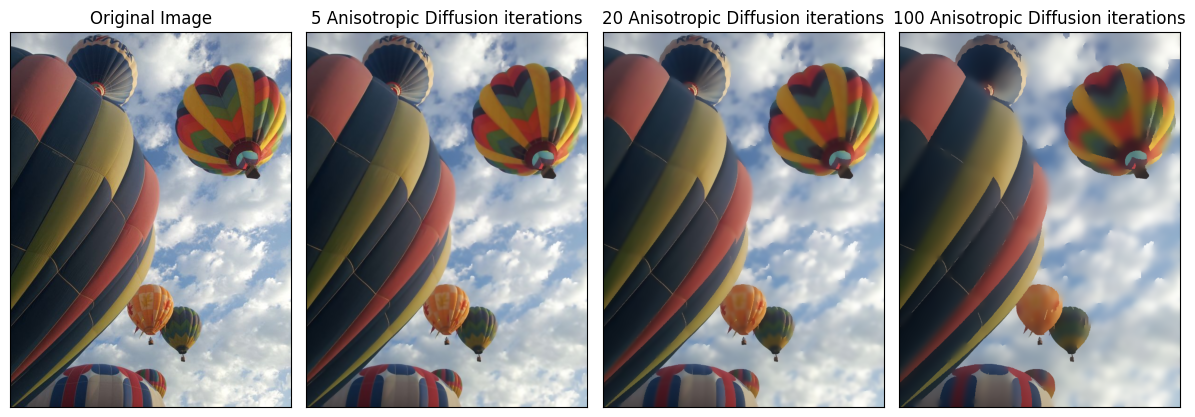

In [8]:
def anisdiff_color(U, N, lambda_, g):
    """ 
    Execute the Anisotropic Diffusion differencing scheme on the 
    array U, representing grayscale values for an image. Conduct 
    N iterations and employ the function g = e^{-x^2/sigma^2} to 
    restrict diffusion across image boundaries. Implement the 
    operation on U in-place for enhanced performance optimization.
    """
    
    # Pad the image with a 1-pixel border of zeros
    U = np.pad(U, 1, mode = 'edge')[:, :, 1:4]
    print(U.shape)
    norm1 = lambda x: np.sqrt(np.sum(x ** 2, axis = 2, keepdims = True))

    for _ in range(N):
        U1 = U[1:-1, 1:-1]
        U[1:-1, 1:-1] = U1 + lambda_ * (g(norm1(U[1:-1, 2:] - U1)) * (U[1:-1, 2:] - U1) + g(norm1(U[1:-1, :-2] - U1)) * (U[1:-1, :-2] - U1) \
            + g(norm1(U[2:, 1:-1] - U1)) * (U[2:, 1:-1] - U1) + g(norm1(U[:-2, 1:-1] - U1)) * (U[:-2, 1:-1] - U1))
    
    return U[1:-1, 1:-1]

# define parameters
s = 0.1
l = 0.25
n = [5, 20, 100]

# define the function g
g = lambda x: np.exp(-(x / s) ** 2)

# load the image
U = imread("balloons_color.jpg") * 1. / 255

# plot the original image
plt.figure(figsize=(12, 20))
plt.subplot(1, 4, 1)
plt.imshow(U)
plt.title("Original Image")
plt.xticks([])
plt.yticks([])

# apply Anisotropic Diffusion to the image
for i, N in enumerate(n):
    U2 = U.copy()
    U2 = anisdiff_color(U2, N, l, g)
    plt.subplot(1, 4, i + 2)
    plt.imshow(U2)
    plt.title(f"{N} Anisotropic Diffusion iterations")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

# Problem 3

Run anisdiff_bw() on the noisy image with σ = .1, λ = .25, N = 20. Display the
original image and the noisy image. Explain why anisotropic diffusion does not smooth out the
noise.

Use the following code to add noise to your grayscale image.

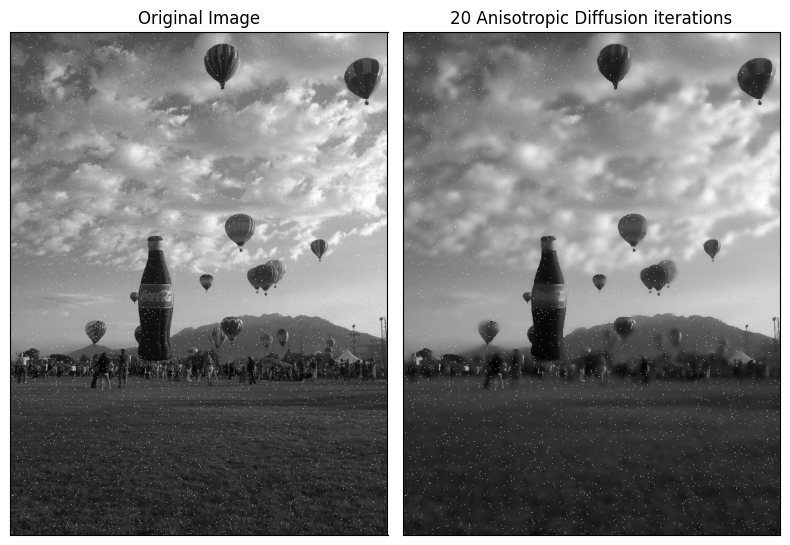

In [9]:
im = imread('coke_balloon.jpg', mode = "F") * 1. / 255
x, y = im.shape
for i in range(x * y // 100):
    im[randint(x), randint(y)] = (127 + randint(127)) * 1. / 255

# plot the original image
plt.figure(figsize=(8, 12))
plt.subplot(1, 2, 1)
plt.imshow(im, cmap = cm.gray)
plt.xticks([])
plt.yticks([])
plt.title("Original Image")

# define parameters
s = 0.1
l = 0.25
n = 20

# define the function g
g = lambda x: np.exp(-(x / s) ** 2)

# apply Anisotropic Diffusion to the image
U1 = im.copy()
U1 = anisdiff_bw(U1, n, l, g)
plt.subplot(1, 2, 2)
plt.imshow(U1, cmap = cm.gray)
plt.title(f"{n} Anisotropic Diffusion iterations")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

# Problem 4

Implement the minimum-biased finite diverence scheme described above. Add noise to
balloons_color.jpg using the provided code below, and clean it using your implementation.
Show the original image, the noised image, and the cleaned image.

In [10]:
def anisdiff_denoise(U, N, lambda_, g):
    """ 
    Apply the Anisotropic Diffusion differencing scheme to 
    the array U, which contains grayscale values representing 
    an image. Conduct N iterations, incorporating the function 
    g = e^{-x^2/sigma^2} to restrict diffusion across image 
    boundaries. Carry out the operation on U in-place to optimize 
    performance. 
    """
    # Pad the image with a 1-pixel border of zeros
    U = np.pad(U, 1, mode = 'edge')[:, :, 1:4]
    norm = lambda x: np.sqrt(np.sum(x ** 2, axis = 2, keepdims = True))

    # Perform N iterations of the Anisotropic Diffusion algorithm
    for _ in range(N):

        # Compute the gradient of the image
        g = np.argsort([norm(U[1:-1, 2:]), norm(U[1:-1, :-2]),
                      norm(U[2:, 1:-1]), norm(U[:-2, 1:-1])])[:2, :, :, 0]
        
        # Compute the mean of the gradient
        if len(g.shape) == 4:
            g = np.squeeze(g, axis = -1)
        g = np.mean(g, axis = 0)
        
        # Update the image
        U[1:-1, 1:-1] = U[1:-1, 1:-1] + lambda_ * g[:, :, np.newaxis] * (U[1:-1, 2:] + U[1:-1, :-2] + U[2:, 1:-1] + U[:-2, 1:-1] - 4 * U[1:-1, 1:-1])
    
    return U[1:-1, 1:-1]

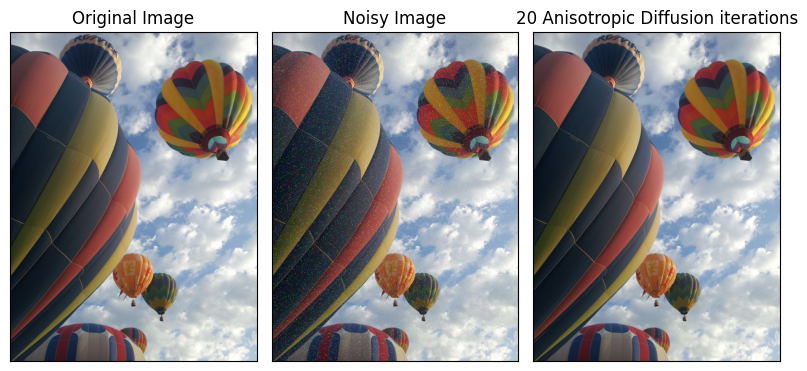

In [12]:
image = imread('balloons_color.jpg') * 1. / 255
noisy_img = imread('balloons_color.jpg') * 1. / 255
x, y, z = image.shape
for dim in range(z):
    for i in range(x * y // 30):

        # add noise to the image
        noisy_img[randint(x),randint(y),dim] = (127 + randint(127)) /255.

# plot the original image
plt.figure(figsize = (8, 12))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.title("Original Image")

# create noisy image
plt.subplot(1, 3, 2)
plt.imshow(noisy_img)
plt.xticks([])
plt.yticks([])
plt.title("Noisy Image")

# define parameters
l = 0.25
n = 20
g = None

# apply Anisotropic Diffusion to the image
U1 = image.copy()
U1 = anisdiff_denoise(U1, n, l, g)

# show denoised image
plt.subplot(1, 3, 3)
plt.imshow(U1)
plt.title(f"{n} Anisotropic Diffusion iterations")
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()